Initial Discovery

In [1]:
import pandas as pd
import numpy as np

file = "C:\\Users\\Catren-PC\\Desktop\\DSI\\team_project\\data\\raw\\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file)

In [2]:
df.drop(columns=['id'], inplace = True)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Pre-processing

In [ ]:
#Replace BMI with mean because it's only 4% missing
df.loc[:, "bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# Split dataset into all stroke patients and 5x the number of non-stroke patients (or try other ratios to see if improve model performance)
#  Enter code here
#
#

In [ ]:
#Split dataset into predictors and outcome vars
X = df.drop(columns=['stroke'])
y = df['stroke']

In [30]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [31]:
print(numerical_cols)
print(categorical_cols)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
#change hypertension and heart disease into objects so they are flagged categorical
X[['hypertension', 'heart_disease']] = X[['hypertension', 'heart_disease']].astype('object')

In [33]:
unique_values = df[['gender', 'work_type', 'Residence_type', 'ever_married', 'smoking_status']].apply(lambda x: x.value_counts()) 
unique_values

,gender,work_type,Residence_type,ever_married,smoking_status
Female,2994.0,NaN,NaN,NaN,NaN
Govt_job,NaN,657.0,NaN,NaN,NaN
Male,2115.0,NaN,NaN,NaN,NaN
Never_worked,NaN,709.0,NaN,NaN,NaN
No,NaN,NaN,NaN,1757.0,NaN
Other,1.0,NaN,NaN,NaN,NaN
Private,NaN,2925.0,NaN,NaN,NaN
Rural,NaN,NaN,2514.0,NaN,NaN
Self-employed,NaN,819.0,NaN,NaN,NaN
Unknown,NaN,NaN,NaN,NaN,1544.0


In [34]:
#Change children to never worked
df['work_type'] = df['work_type'].replace('children', 'Never_worked')

In [35]:
#Update the numeric and categorical cols
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols) 
print(categorical_cols)

['age', 'avg_glucose_level', 'bmi']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [37]:
#Scale the numeric cols and get dummies for categoricals
from sklearn.preprocessing import StandardScaler

categorical_cols = [col for col in categorical_cols if col in X.columns]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = [col for col in numerical_cols if col in X.columns]

if numerical_cols:
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X[:5])

        age  avg_glucose_level           bmi  gender_Male  gender_Other  \
0  1.051434           2.706375  1.001234e+00         True         False   
1  0.786070           2.121559  4.615554e-16        False         False   
2  1.626390          -0.005028  4.685773e-01         True         False   
3  0.255342           1.437358  7.154182e-01        False         False   
4  1.582163           1.501184 -6.357112e-01        False         False   

   hypertension_1  heart_disease_1  ever_married_Yes  work_type_Never_worked  \
0           False             True              True                   False   
1           False            False              True                   False   
2           False             True              True                   False   
3           False            False              True                   False   
4            True            False              True                   False   

   work_type_Private  work_type_Self-employed  Residence_type_Urban 

In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_cols = [col for col in numerical_cols if col in X.columns]

X_with_const = add_constant(X[numerical_cols])

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols

vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(numerical_cols))]

high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()

numerical_cols = [col for col in numerical_cols if col not in high_vif_features]

print(f"VIF features: {high_vif_features}")
print(vif_data)

#VIFs are low, no collinearity

VIF features: []
             Feature       VIF
0                age  1.000000
1  avg_glucose_level  1.163836
2                bmi  1.070682


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 15)
(4088,)
(1022, 15)
(1022,)


In [41]:
from sklearn.linear_model import LogisticRegression

# xgboost - Neethila
# Decision Tree - Devangi
# GradientBoost - Catherine
# Log Reg - Rui Qian Sun 
# - Mahbub
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [42]:
y_pred = model.predict(X_test)

In [43]:
counts = np.bincount(y_pred)

print(counts[0])
print(counts[1])

732
290


In [44]:
print(y_test.value_counts())

stroke
0    972
1     50
Name: count, dtype: int64


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# y_test: true labels, y_pred: predicted labels
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")
# check log reg requirements, dependent is binary? multicollinerarity? linear relationship of continous predictors? independent? outliers?
# scatter plot the continuous variables?

Accuracy: 0.7455968688845401
[[722 250]
 [ 10  40]]
F1 Score: 0.23529411764705882


Try lowering decision threshold

In [49]:
# Make predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Change the threshold (default 0.5) to something lower
y_pred = (y_prob > 0.45).astype(int)

# Evaluate the model using your custom threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#More false positives but 2 fewer false neg

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.84      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.72      0.80      1022

[[693 279]
 [  8  42]]


In [50]:
import pandas as pd
import numpy as np

coefficients = model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)


                           Feature  Coefficient  Abs_Coefficient
0                              age     1.883791         1.883791
8           work_type_Never_worked     0.884586         0.884586
5                   hypertension_1     0.587278         0.587278
14           smoking_status_smokes     0.317050         0.317050
6                  heart_disease_1     0.226914         0.226914
10         work_type_Self-employed    -0.222617         0.222617
1                avg_glucose_level     0.195875         0.195875
13     smoking_status_never smoked    -0.179015         0.179015
7                 ever_married_Yes    -0.162455         0.162455
11            Residence_type_Urban     0.146779         0.146779
12  smoking_status_formerly smoked     0.140147         0.140147
3                      gender_Male    -0.128004         0.128004
2                              bmi     0.072826         0.072826
9                work_type_Private     0.016650         0.016650
4                     gen

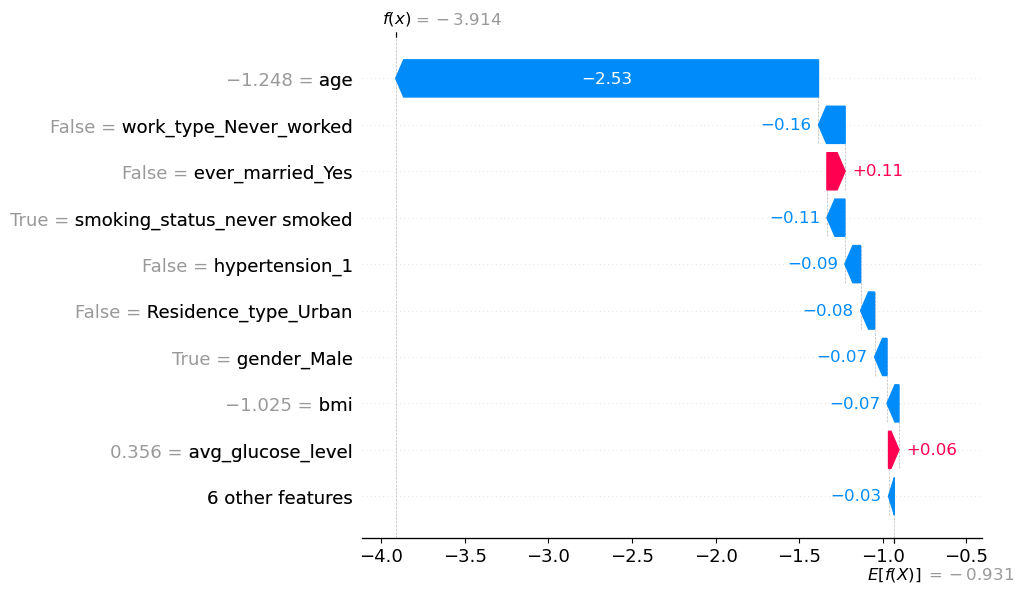

In [82]:
# SHAP
import shap

explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for your dataset (e.g., the first few rows of X_train)
shap_values = explainer(X_train)
 

# Visualize the SHAP values for the first instance (index 0) using a waterfall plot
shap.plots.waterfall(shap_values[1])
#shap.plots.beeswarm(shap_values)


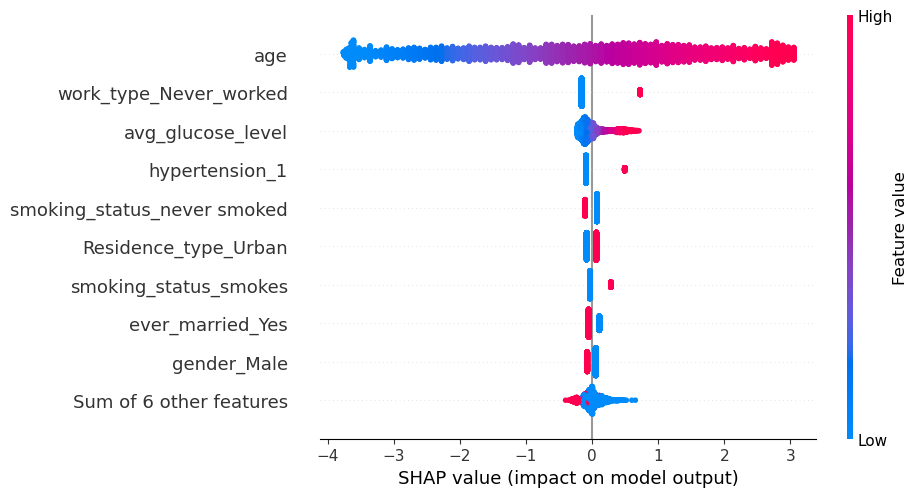

In [83]:
# Convert SHAP values to a standard NumPy array with numerical data type
shap_values_array = shap_values.values  # Access the raw SHAP values

# If shap_values_array is a list of arrays, convert it to a single array
if isinstance(shap_values_array, list) and all(isinstance(item, np.ndarray) for item in shap_values_array):
    shap_values_array = np.concatenate(shap_values_array)

# Ensure the data type is compatible with NumPy's round function (e.g., float64)
shap_values_array = shap_values_array.astype(np.float64)

# Create a new Explanation object with the converted SHAP values
shap_values_converted = shap.Explanation(
    values=shap_values_array,
    base_values=shap_values.base_values,
    data=shap_values.data,
    feature_names=shap_values.feature_names,
    display_data=shap_values.display_data,
)

# Now, plot the beeswarm using the converted SHAP values
shap.plots.beeswarm(shap_values_converted)

Dealing with large proportion of unknown smoking status
1) remove all records with unknown smoking status - not ideal bc 19% of stroke patients are missing smoke
2) group smoking into smoke yes/no- randomize unknowns into y/n
3) impute with random value btwn never, former, current
3) impute with predicted value

In [22]:
df['smoking_status'].value_counts()
#Large number of unknowns

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [57]:
pd.crosstab(df['stroke'], df['smoking_status']) 

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


In [ ]:
#Option 3: Randomly assign to never, former, or current smoker
import random

df2= df.copy()

unknown_mask = df2['smoking_status'] == 'Unknown'
unknown_indices = df2[unknown_mask].index

# Randomly assign smoking status to unknowns
smoking_statuses = ['never smoked', 'formerly smoked', 'smokes']
for index in unknown_indices:
    df2.loc[index, 'smoking_status'] = random.choice(smoking_statuses)

In [53]:
df2['smoking_status'].value_counts()

smoking_status
never smoked       2421
formerly smoked    1373
smokes             1316
Name: count, dtype: int64

In [58]:
pd.crosstab(df2['stroke'], df2['smoking_status']) 

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,1285,2322,1254
1,88,99,62
